In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from extract_npl_data import extract_npl
from extract_macroeconomic_data import extract_reporate, extract_cpi, extract_unemployment, extract_gdp

In [2]:
npl_df = extract_npl()

#npl_df = pd.read_csv('npl_data_all_banks.csv', encoding='utf-8')

reporate_df = extract_reporate()
cpi_df = extract_cpi()
unemployment_df = extract_unemployment()
gdp_df = extract_gdp()

🚀 Starting bulk NPL data extraction...
🔍 Scanning directory: test_data

📁 Processing folder: BA900_2024-06-01_zipcsv -> 2024-06
  ✓ CAPITEC BANK                   NPL: 218.91%
  ⚠ 159158.csv                     No loan data found
  ⚠ 170534.csv                     No loan data found
  ⚠ 341037.csv                     No loan data found
  ✓ ACCESS BANK (SOUTH AFRICA) LIM NPL: 5.42%
  ✓ DISCOVERY BANK LIMITED         NPL: 9.15%
  ⚠ 172286.csv                     No loan data found
  ⚠ 148520.csv                     No loan data found
  ⚠ 155438.csv                     No loan data found
  ✓ FIRSTRAND BANK LIMITED         NPL: 64.03%
  ⚠ 165239.csv                     No loan data found
  ⚠ 172618.csv                     No loan data found
  ⚠ 477745.csv                     No loan data found
  ✓ CITIBANK N.A                   NPL: 3.55%
  ⚠ 129593.csv                     No loan data found
  ✓ HSBC BANK PLC - JOHANNESBURG B NPL: 508.23%
  ✓ INVESTEC BANK LTD              NPL: 127.47%
  ✓

In [3]:
npl_df

,institution,date,file_path,gross_loans,credit_impairments,npl_ratio
133,ABSA BANK LTD,2022-01-01,test_data/BA900_2022-01-01_zipcsv/34118.csv,36866573.0,31941837.0,86.641731
126,AFRICAN BANK LIMITED (N),2022-01-01,test_data/BA900_2022-01-01_zipcsv/160571.csv,3781224.0,10205358.0,269.895621
127,BANK OF CHINA LTD JHB BRANCH (T/A BANK OF CHIN...,2022-01-01,test_data/BA900_2022-01-01_zipcsv/337889.csv,6555376.0,359716.0,5.487344
131,BNP PARIBAS SOUTH AFRICA BRANCH,2022-01-01,test_data/BA900_2022-01-01_zipcsv/478636.csv,17.0,19661.0,115652.941176
119,CAPITEC BANK,2022-01-01,test_data/BA900_2022-01-01_zipcsv/333107.csv,6822732.0,18131045.0,265.744646
...,...,...,...,...,...,...
214,INVESTEC BANK LTD,2025-02-01,test_data/BA900_2025-02-01_zipcsv/25054.csv,2335914.0,3032562.0,129.823358
221,JPMORGAN CHASE BANK (JOHANNESBURG BRANCH),2025-02-01,test_data/BA900_2025-02-01_zipcsv/331899.csv,9.0,55184.0,613155.555556
218,NEDBANK LTD,2025-02-01,test_data/BA900_2025-02-01_zipcsv/416088.csv,18750887.0,27306423.0,145.627367
215,STANDARD CHARTERED BANK,2025-02-01,test_data/BA900_2025-02-01_zipcsv/535788.csv,290043.0,283777.0,97.839631


In [4]:
reporate_df

,date,repo_rate
0,2025-07-01,7.25
1,2025-06-30,7.25
2,2025-06-27,7.25
3,2025-06-26,7.25
4,2025-06-25,7.25
...,...,...
866,2022-01-07,3.75
867,2022-01-06,3.75
868,2022-01-05,3.75
869,2022-01-04,3.75


In [5]:
cpi_df.head()

,date,inflation_rate
0,2022-01-01,5.7
1,2022-02-01,5.7
2,2022-03-01,5.9
3,2022-04-01,5.9
4,2022-05-01,6.5


In [6]:
unemployment_df.head()

,date,unemployment_rate
0,2021-10-01,35.27707
1,2022-01-01,34.23624
2,2022-04-01,34.20478
3,2022-07-01,32.85991
4,2022-10-01,32.76240


In [7]:
gdp_df.head()

,date,gdp
0,2021-10-01,1134883.9
1,2022-01-01,1152147.1
2,2022-04-01,1141637.0
3,2022-07-01,1162811.0
4,2022-10-01,1146094.5


## Merging Datasets

In [8]:
# merge reporate_df with npl_df

npl_df['date'] = pd.to_datetime(npl_df['date'], format='%Y-%m-%d')
reporate_df['date'] = pd.to_datetime(reporate_df['date'], format='%Y-%m-%d')

merged_df = pd.merge_asof(
	npl_df.sort_values('date'),           # Left dataframe (NPL data)
	reporate_df.sort_values('date'),      # Right dataframe (repo rates)
	on='date',           				  # Merge on date column
	direction='backward', 				  # Find most recent repo rate before/on each NPL date
	tolerance=pd.Timedelta('31D')  		  # Allow a tolerance of 1 month
)

In [9]:
# merge cpi_df with merged_df

cpi_df['date'] = pd.to_datetime(cpi_df['date'], format='%Y-%m-%d')

merged_df = pd.merge_asof(
	merged_df.sort_values('date'),        # Left dataframe (NPL data)
	cpi_df.sort_values('date'),      	  # Right dataframe (repo rates)
	on='date',           				  # Merge on date column
	direction='backward', 				  # Find most recent repo rate before/on each NPL date
	tolerance=pd.Timedelta('31D')  		  # Allow a tolerance of 1 month
)

In [10]:
# merge unemployment_df with merged_df

unemployment_df['date'] = pd.to_datetime(unemployment_df['date'], format='%Y-%m-%d')

merged_df = pd.merge_asof(
	merged_df.sort_values('date'),        # Left dataframe (NPL data)
	unemployment_df.sort_values('date'),      	  # Right dataframe (repo rates)
	on='date',           				  # Merge on date column
	direction='backward', 				  # Find most recent repo rate before/on each NPL date
	tolerance=pd.Timedelta('92D')  		  # Allow a tolerance of 1 month
)

In [11]:
# merge gdp_df with merged_df

gdp_df['date'] = pd.to_datetime(gdp_df['date'], format='%Y-%m-%d')

merged_df = pd.merge_asof(
	merged_df.sort_values('date'),        # Left dataframe (NPL data)
	gdp_df.sort_values('date'),      	  # Right dataframe (repo rates)
	on='date',           				  # Merge on date column
	direction='backward', 				  # Find most recent repo rate before/on each NPL date
	tolerance=pd.Timedelta('92D')  		  # Allow a tolerance of 1 month
)

In [12]:
merged_df

,institution,date,file_path,gross_loans,credit_impairments,npl_ratio,repo_rate,inflation_rate,unemployment_rate,gdp
0,ABSA BANK LTD,2022-01-01,test_data/BA900_2022-01-01_zipcsv/34118.csv,3.686657e+07,3.194184e+07,86.641731,NaN,5.7,34.23624,1152147.1
1,CAPITEC BANK,2022-01-01,test_data/BA900_2022-01-01_zipcsv/333107.csv,6.822732e+06,1.813104e+07,265.744646,NaN,5.7,34.23624,1152147.1
2,FIRSTRAND BANK LIMITED,2022-01-01,test_data/BA900_2022-01-01_zipcsv/416053.csv,4.692968e+07,3.583098e+07,76.350363,NaN,5.7,34.23624,1152147.1
3,AFRICAN BANK LIMITED (N),2022-01-01,test_data/BA900_2022-01-01_zipcsv/160571.csv,3.781224e+06,1.020536e+07,269.895621,NaN,5.7,34.23624,1152147.1
4,BANK OF CHINA LTD JHB BRANCH (T/A BANK OF CHIN...,2022-01-01,test_data/BA900_2022-01-01_zipcsv/337889.csv,6.555376e+06,3.597160e+05,5.487344,NaN,5.7,34.23624,1152147.1
...,...,...,...,...,...,...,...,...,...,...
556,NEDBANK LTD,2025-02-01,test_data/BA900_2025-02-01_zipcsv/416088.csv,1.875089e+07,2.730642e+07,145.627367,7.5,3.2,32.68566,1169838.5
557,DISCOVERY BANK LIMITED,2025-02-01,test_data/BA900_2025-02-01_zipcsv/165271.csv,6.598857e+06,6.165720e+05,9.343618,7.5,3.2,32.68566,1169838.5
558,HSBC BANK PLC - JOHANNESBURG BRANCH,2025-02-01,test_data/BA900_2025-02-01_zipcsv/535761.csv,1.702600e+04,7.959900e+04,467.514390,7.5,3.2,32.68566,1169838.5
559,AFRICAN BANK LIMITED (N),2025-02-01,test_data/BA900_2025-02-01_zipcsv/160571.csv,1.070224e+07,1.041533e+07,97.319151,7.5,3.2,32.68566,1169838.5


In [13]:
merged_df.describe()

,date,gross_loans,credit_impairments,npl_ratio,repo_rate,inflation_rate,unemployment_rate,gdp
count,561,5.610000e+02,5.610000e+02,5.610000e+02,546.000000,561.000000,561.000000,5.610000e+02
mean,2023-07-16 04:16:41.069518592,1.315545e+07,1.260669e+07,7.379261e+04,7.145147,5.599109,32.819948,1.159494e+06
min,2022-01-01 00:00:00,1.000000e+00,9.228000e+03,5.067678e-01,4.000000,2.800000,31.964000,1.141637e+06
25%,2022-10-01 00:00:00,2.612990e+05,8.835800e+04,5.889113e+01,6.250000,4.800000,32.186050,1.154024e+06
50%,2023-07-01 00:00:00,3.115332e+06,9.135230e+05,1.179379e+02,7.750000,5.600000,32.685660,1.163383e+06
75%,2024-05-01 00:00:00,1.820908e+07,2.556325e+07,2.638789e+02,8.250000,6.900000,32.859910,1.164448e+06
max,2025-02-01 00:00:00,6.913820e+07,5.447442e+07,9.529200e+06,8.250000,7.800000,34.236240,1.169838e+06
std,NaN,1.920503e+07,1.656138e+07,5.747993e+05,1.446245,1.425413,0.727651,8.357558e+03


In [14]:
# Check the actual calculation
print("Sample calculations:")
print(merged_df[['institution', 'credit_impairments', 'gross_loans', 'npl_ratio']].head())

Sample calculations:
                                         institution  credit_impairments  \
0                                      ABSA BANK LTD        3.194184e+07   
1                                       CAPITEC BANK        1.813104e+07   
2                             FIRSTRAND BANK LIMITED        3.583098e+07   
3                           AFRICAN BANK LIMITED (N)        1.020536e+07   
4  BANK OF CHINA LTD JHB BRANCH (T/A BANK OF CHIN...        3.597160e+05   

    gross_loans   npl_ratio  
0  3.686657e+07   86.641731  
1  6.822732e+06  265.744646  
2  4.692968e+07   76.350363  
3  3.781224e+06  269.895621  
4  6.555376e+06    5.487344  


In [15]:
# Check impossible ratios
print("Banks with NPL > 100%:")
print(merged_df[merged_df['npl_ratio'] > 100][['institution', 'credit_impairments', 'gross_loans', 'npl_ratio']])

Banks with NPL > 100%:
                                   institution  credit_impairments  \
1                                 CAPITEC BANK          18131045.0   
3                     AFRICAN BANK LIMITED (N)          10205358.0   
7              BNP PARIBAS SOUTH AFRICA BRANCH             19661.0   
8                              GBS MUTUAL BANK              9228.0   
10                                 NEDBANK LTD          23539245.0   
..                                         ...                 ...   
554                            GBS MUTUAL BANK             24807.0   
555  JPMORGAN CHASE BANK (JOHANNESBURG BRANCH)             55184.0   
556                                NEDBANK LTD          27306423.0   
558        HSBC BANK PLC - JOHANNESBURG BRANCH             79599.0   
560               THE STANDARD BANK OF S A LTD          52572369.0   

     gross_loans      npl_ratio  
1      6822732.0     265.744646  
3      3781224.0     269.895621  
7           17.0  115652.941176  


In [16]:
# Check if impairments > loans
impossible = merged_df[merged_df['credit_impairments'] > merged_df['gross_loans']]
print(f"\n{len(impossible)} observations where impairments > loans")


321 observations where impairments > loans


In [17]:
# Keep only realistic NPL ratios
clean_df = merged_df[(merged_df['npl_ratio'] >= 0) & (merged_df['npl_ratio'] <= 15)]
print(f"Clean dataset: {len(clean_df)} observations")

Clean dataset: 96 observations


### Exploratory Data Analysis

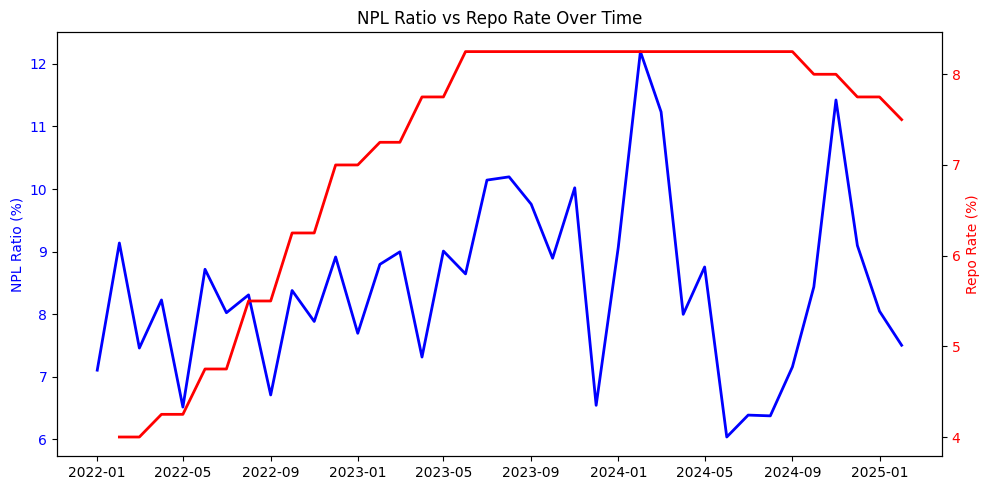

In [18]:
# Group by date to get monthly averages
monthly_data = clean_df.groupby('date').agg({
    'npl_ratio': 'mean',
    'repo_rate': 'first'
}).reset_index()

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# NPL ratio on left axis
ax1.plot(monthly_data['date'], monthly_data['npl_ratio'], 'b-', linewidth=2, label='NPL Ratio')
ax1.set_ylabel('NPL Ratio (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Repo rate on right axis
ax2 = ax1.twinx()
ax2.plot(monthly_data['date'], monthly_data['repo_rate'], 'r-', linewidth=2, label='Repo Rate')
ax2.set_ylabel('Repo Rate (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('NPL Ratio vs Repo Rate Over Time')
plt.tight_layout()
plt.show()

Upon visual inspection, the two spikes in the NPL ratio suggest either calculation or data entry errors. 

Cap those dates and plot again for further analysis.

In [19]:
list(merged_df)

['institution',
 'date',
 'file_path',
 'gross_loans',
 'credit_impairments',
 'npl_ratio',
 'repo_rate',
 'inflation_rate',
 'unemployment_rate',
 'gdp']

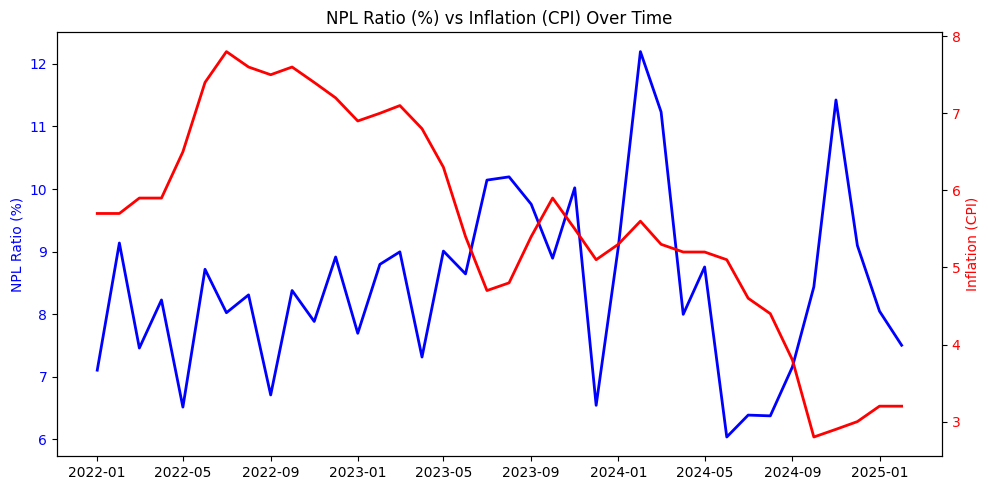

In [20]:
# Group by date to get monthly averages
monthly_data = clean_df.groupby('date').agg({
    'npl_ratio': 'mean',
    'inflation_rate': 'first'
}).reset_index()

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# NPL ratio on left axis
ax1.plot(monthly_data['date'], monthly_data['npl_ratio'], 'b-', linewidth=2, label='NPL Ratio')
ax1.set_ylabel('NPL Ratio (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Repo rate on right axis
ax2 = ax1.twinx()
ax2.plot(monthly_data['date'], monthly_data['inflation_rate'], 'r-', linewidth=2, label='Inflation (CPI)')
ax2.set_ylabel('Inflation (CPI)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('NPL Ratio (%) vs Inflation (CPI) Over Time')
plt.tight_layout()
plt.show()

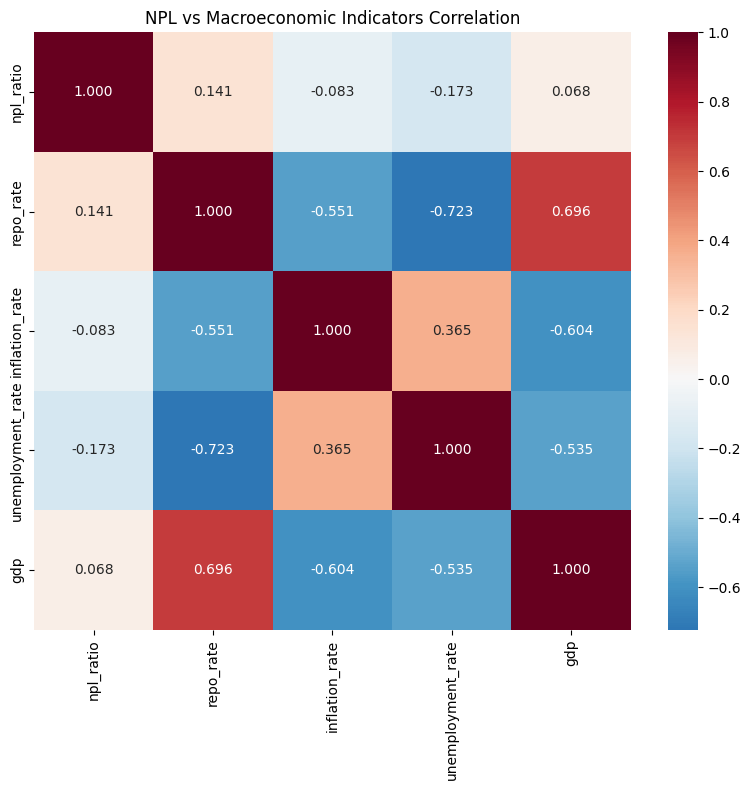

In [21]:
# Select numeric columns for correlation
corr_data = clean_df[['npl_ratio', 'repo_rate', 'inflation_rate', 'unemployment_rate', 'gdp']].corr()

# Create heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_data, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
plt.title('NPL vs Macroeconomic Indicators Correlation')
plt.tight_layout()
plt.show()

Overall weak relationships between NPL and macro-economic indicators.
Inflation is slightly negative (-0.062) which is unexpected.

**Conclusion:**

I have not been able to extract the relevant loan data to calculate NPL.